# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

Importing or calling all necessary models

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# DataSet:
Loading / Cleaning / Formatting

In [216]:
df=pd.read_csv('Churn.csv')
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [217]:
df=pd.DataFrame(data=df)
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [218]:
#First five data rows of the data
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [219]:
#Last five data rows of the data
df.tail()

state  account length  area code phone number international plan  \
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3328               2.67                       2  False  
3329               2.59                       3  False  
3330               3.81                       2  False  
3331               1.35                       2  False  
3332               3.70                       0  False  

[5 rows x 21 columns]

In [220]:
#Shape of the data 
df.shape

(3333, 21)

In [221]:
#Information regarding our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [222]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

The Description here shows that the mean standard deviation minimum and maximum value of each variables: such as if we consider the total day calls then our average calls per day among all the states is 100calls where min call is 0 and maximum is 165 by a state, 50% shows the approx mean. we an also determine that 25% and 75% of the calls per day by the whole states which is 87 and 114 respectively.

In [223]:
df.churn.unique()

array([False,  True])

In [224]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [225]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

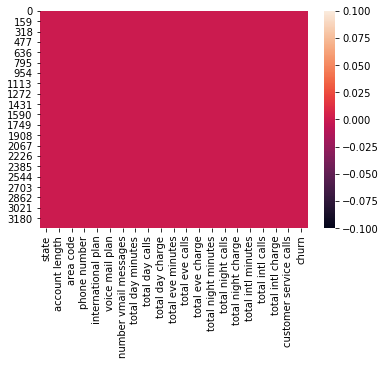

In [226]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is emmpty(Null Values).

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [227]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

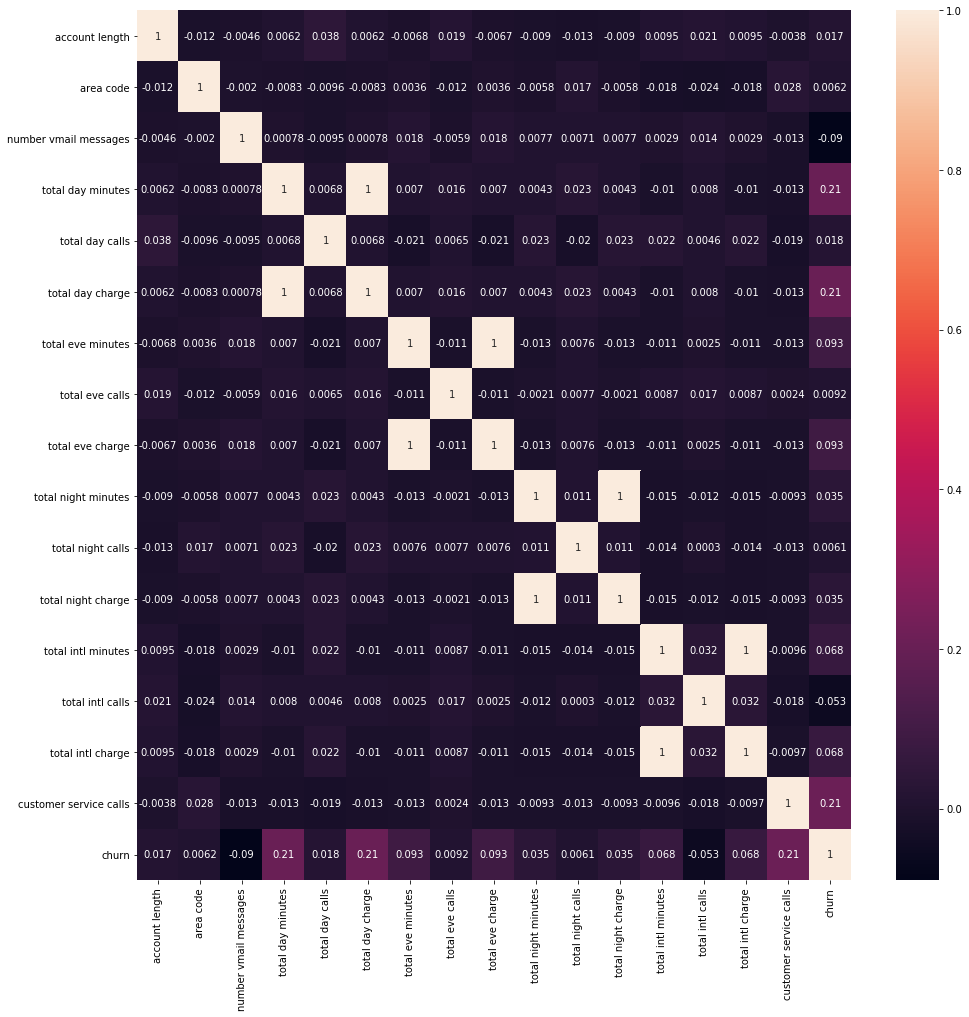

In [228]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Through the above graph heatmap, we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking all of them in to the consideration. But there is one field which is showing negative correlation with the targeted variable that is: number vmail messages


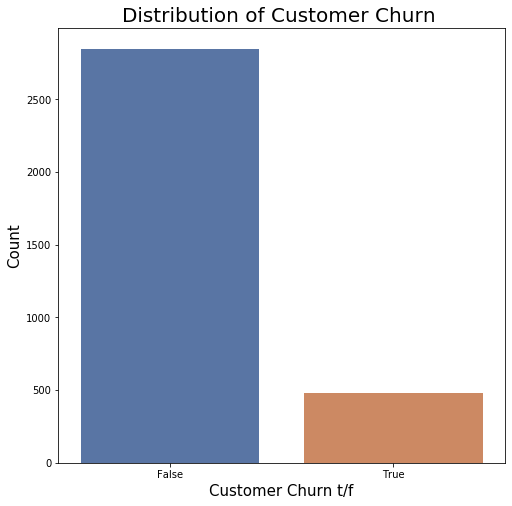

In [229]:
#Data distribution of the Target Variable:
plt.figure(figsize=(8,8))
sns.countplot(x = df.churn,palette='deep')
plt.xlabel('Customer Churn t/f', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Customer Churn ",fontsize= 20)
plt.show()

The Above graph shows that if the custumer have been churned or if he has been retained , as we know that retaining the customer is more cost saving techniques for the company to grow.

Here IBM is cost effective where it implies that out of 3333 customers IBM has retained 2850 customers where churned customeres are only few in numbere i.e. 483. 

# Checking data distribution with respect to target variable

In [230]:
def dis_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 50)
    plt.show()

State VS Churn

The below graph states the distribution of the retained customer and churned customer with respect to the state. 
1. Highest retained customers are in WV state
2. Highest churned customers are in NJ & TX states

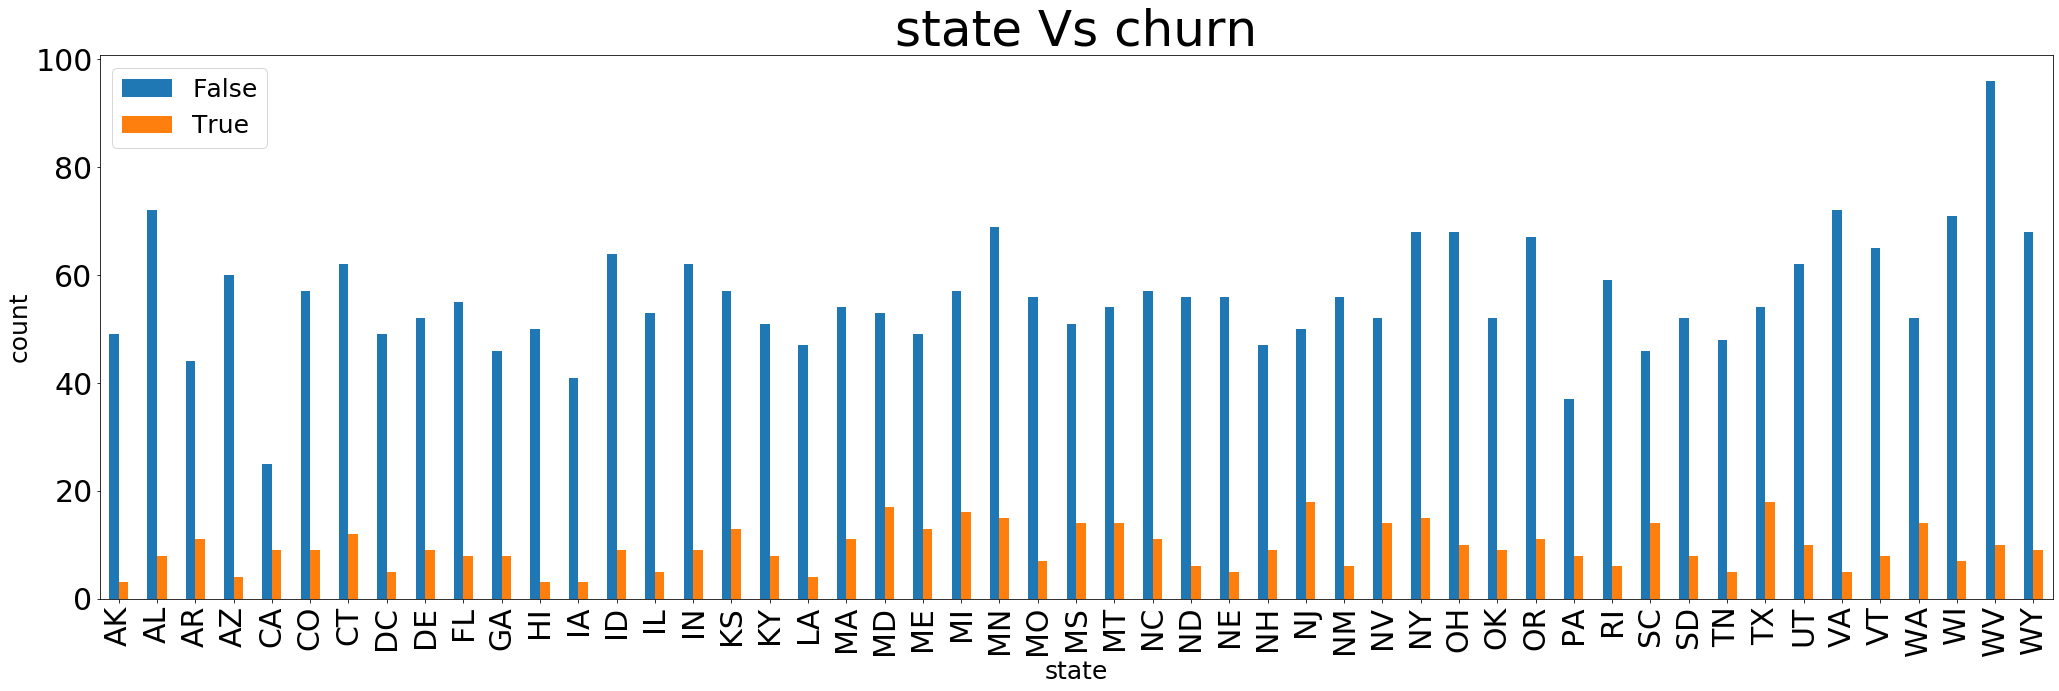

In [231]:
dis_bar('state','churn')

Voice mail plan VS Churn

The below graph states the distribution of the retained customer and churned customer with respect to the voice mail plan .

Most of the customers i.e. around 2500 who are retainedand churned does not have the voice mail plan.

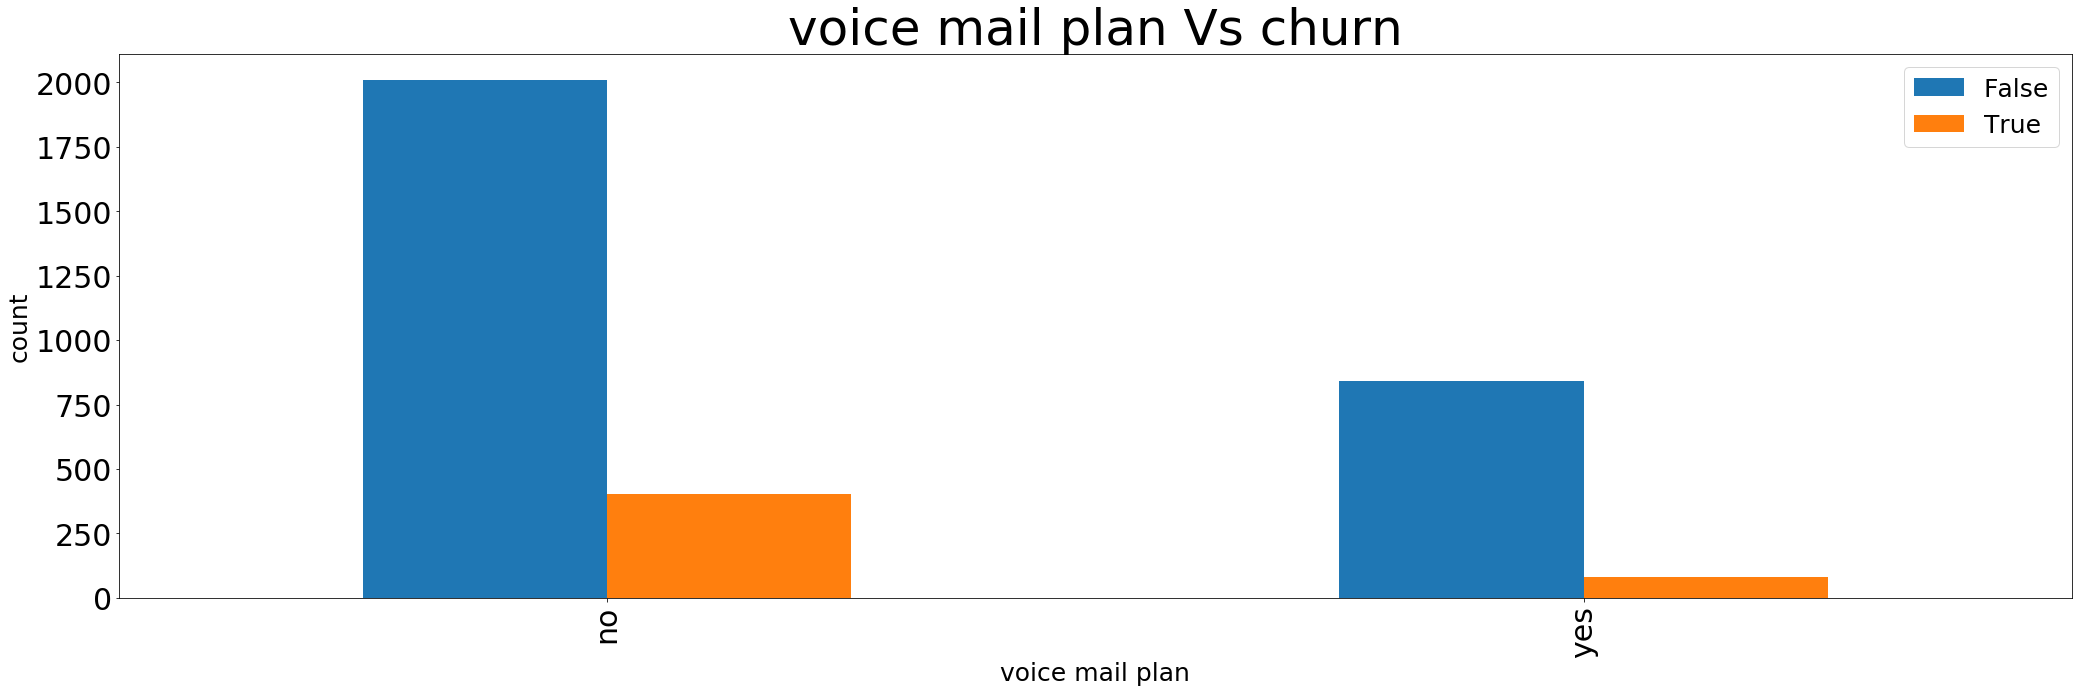

In [232]:
dis_bar('voice mail plan','churn')

Area Code VS Churn

The below graph states the distribution of the retained customer and churned customer with respect to the area code .

Around 1600 i.e. 50% of the customers belong to the area code 415

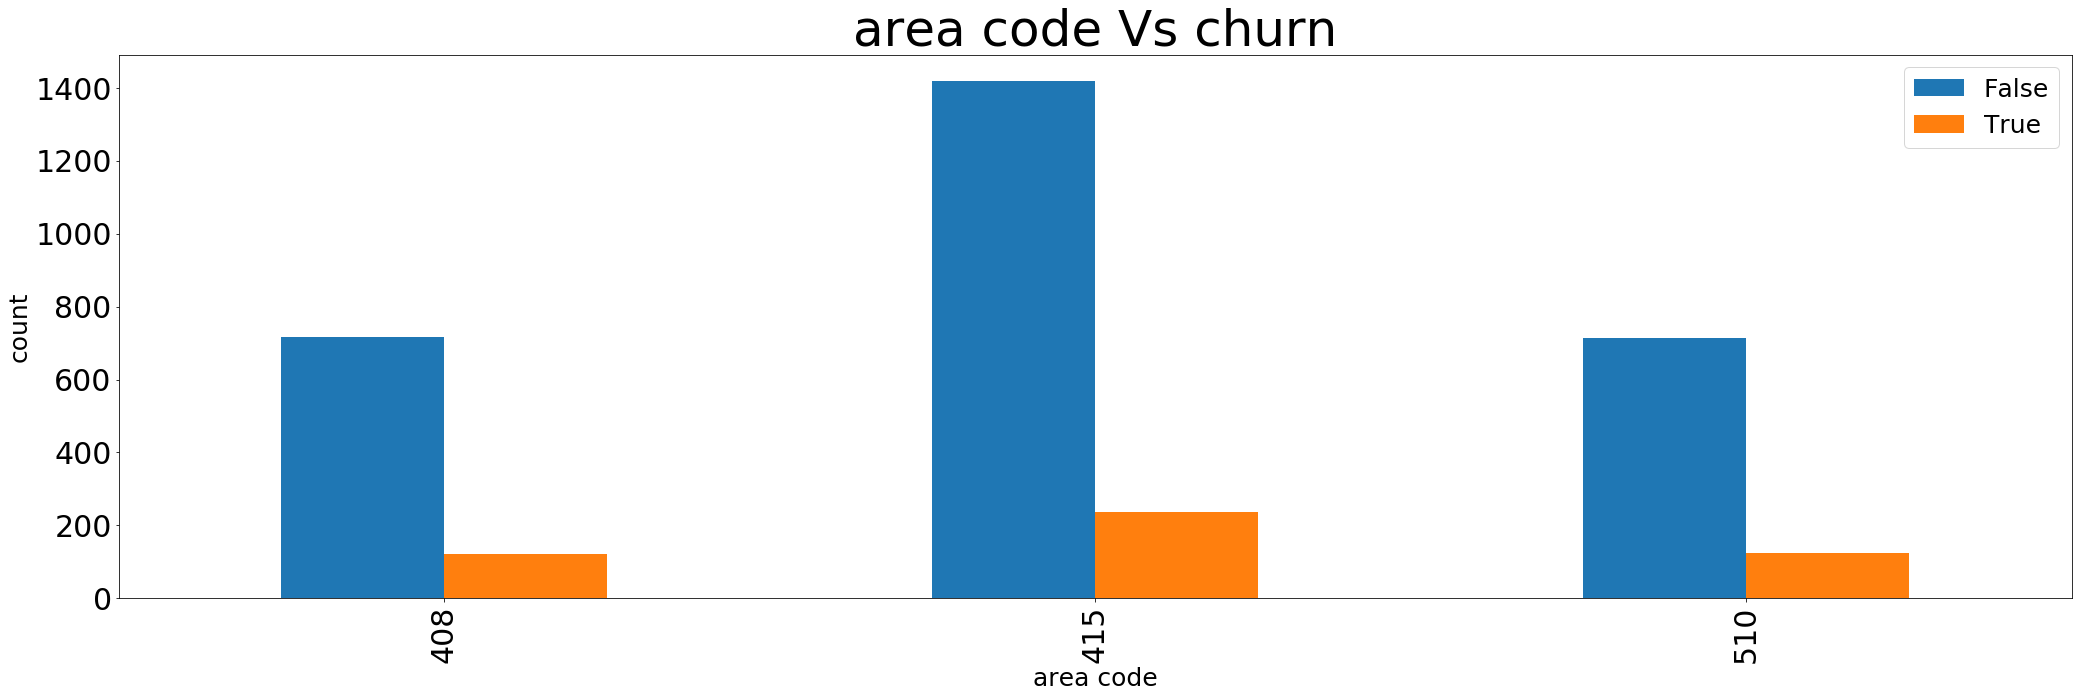

In [233]:
dis_bar('area code','churn')

International_Plan VS Churn

The below graph states the distribution of the retained customer and churned customer with respect to the international plan.

Around 90% of the customers includes churned and retained dose not have international plan with them.

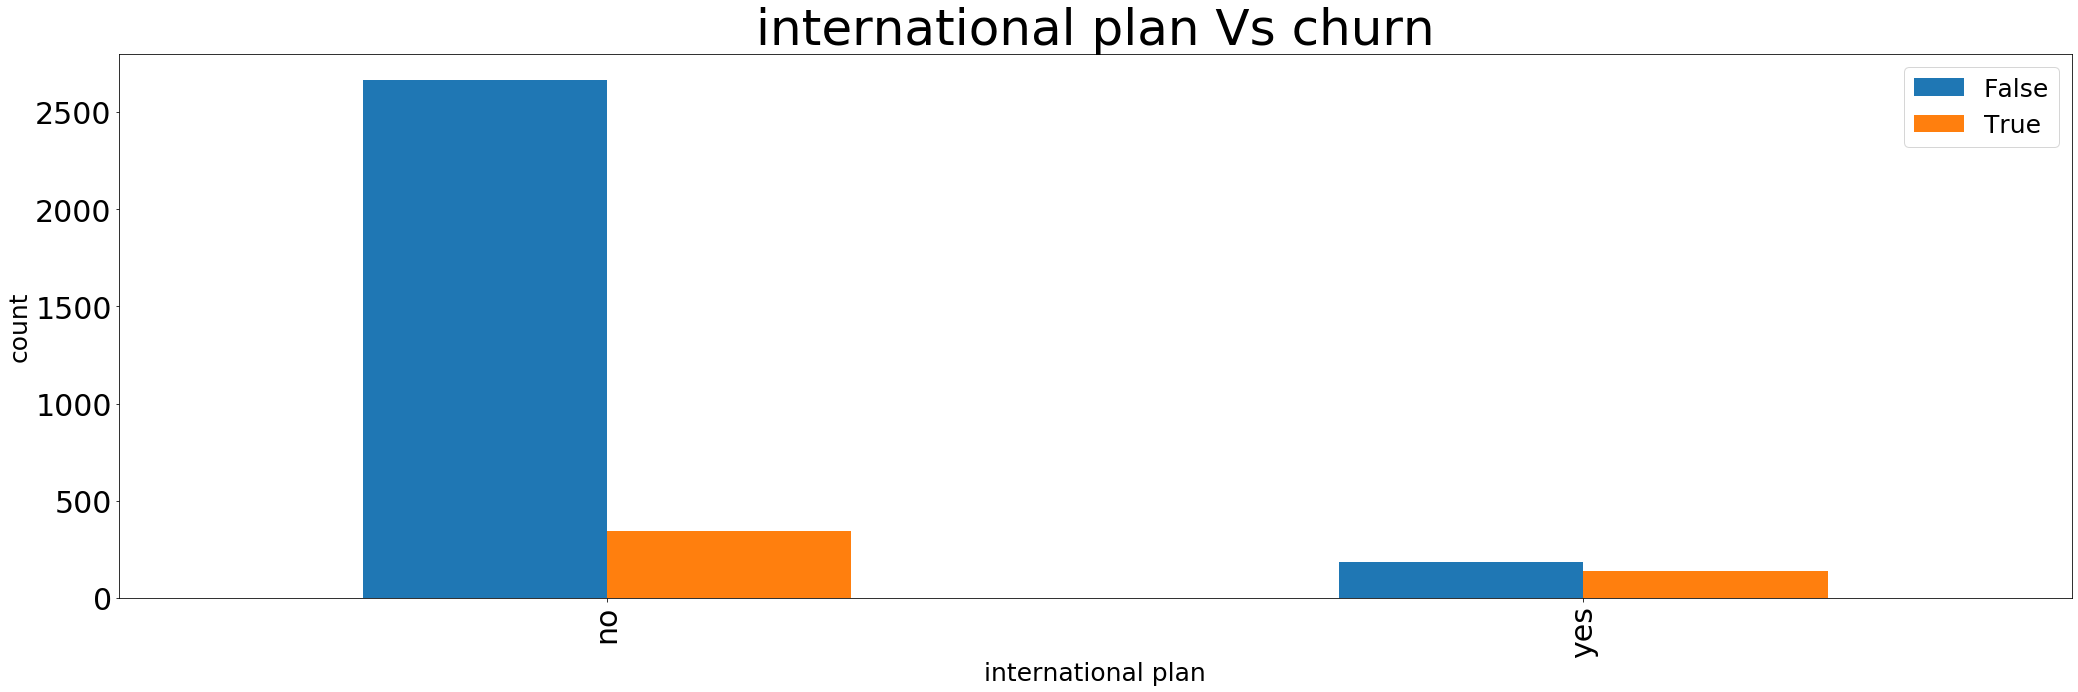

In [234]:
dis_bar('international plan','churn')

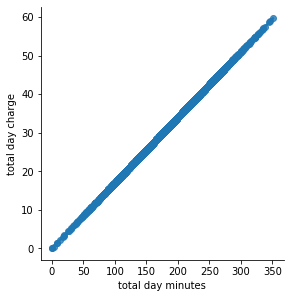

In [235]:
sns.pairplot(df, x_vars=['total day minutes'], y_vars='total day charge', size=4, aspect=1, kind='reg')

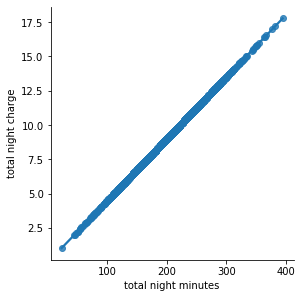

In [236]:
sns.pairplot(df, x_vars=['total night minutes'], y_vars='total night charge', size=4, aspect=1, kind='reg')

The above two graph denotes the strong corelation between the variables:
 1. total night minutes VS total night charge
 2. total day minutes VS total day charge

In [237]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

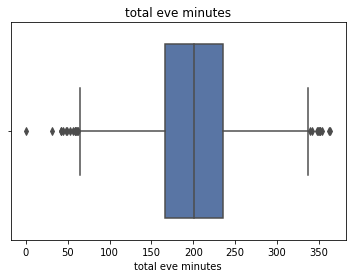

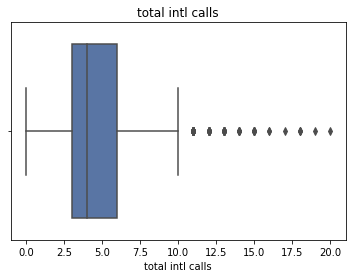

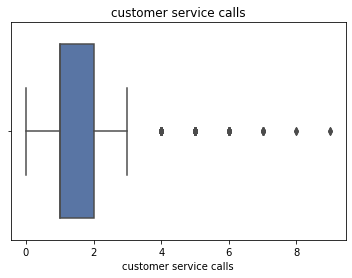

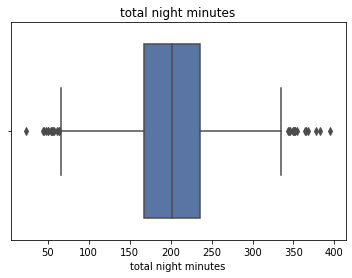

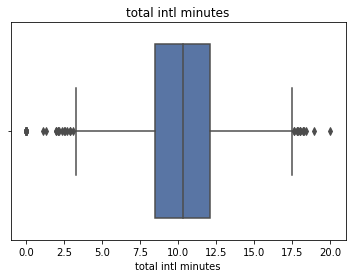

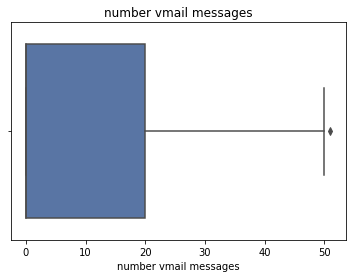

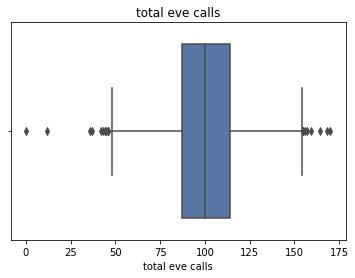

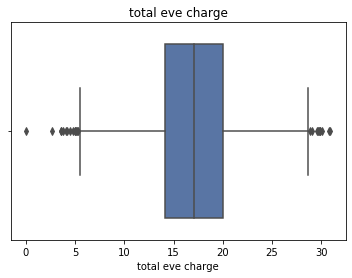

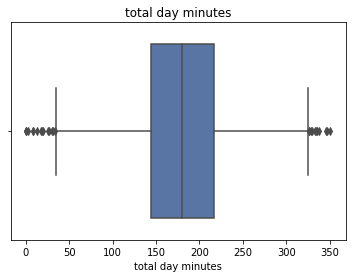

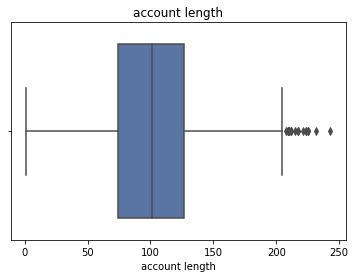

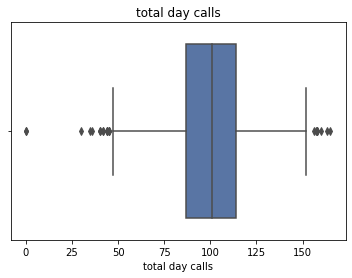

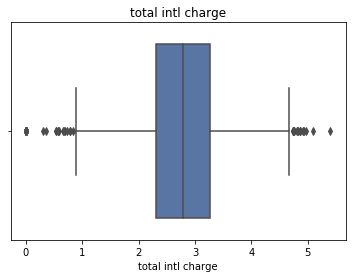

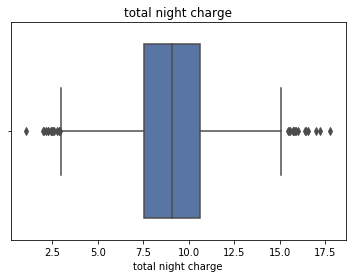

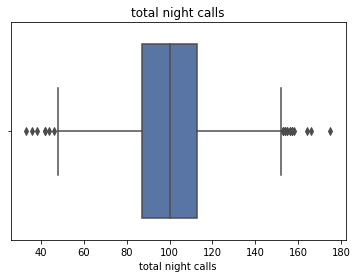

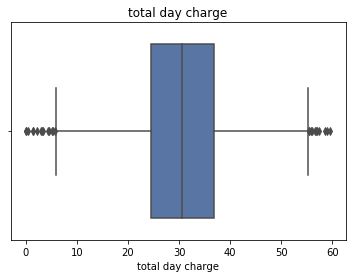

In [238]:
columns={'account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

The plot box situated above and below are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as:

'account length', 'number vmail messages','total day minutes', 'total day calls', 'total day charge','total eve minutes', 'total eve calls', 'total eve charge','total night minutes', 'total night calls', 'total night charge','total intl minutes', 'total intl calls', 'total intl charge','customer service calls'

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

In [239]:
#converting categoric to num codes
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [240]:
df=cat_to_num(df)

In [241]:
df.head()

state  account length  area code phone number international plan  \
0    16             128        415         1926                  0   
1    35             107        415         1575                  0   
2    31             137        415         1117                  0   
3    35              84        408         1707                  1   
4    36              75        415          110                  1   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0               1                     25              265.1              110   
1               1                     26              161.6              123   
2               0                      0              243.4              114   
3               0                      0              299.4               71   
4               0                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [242]:
#Converting to nan

columns={'account length', 'area code',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'}
for i in columns:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
    df.loc[df.loc[:,i] < minn,i] = np.nan
    df.loc[df.loc[:,i] > maxx,i] = np.nan
    print('{var} --> {X}   Missing'.format(var = i, X = (df.loc[:,i].isnull().sum())))

total eve minutes --> 24   Missing
total intl calls --> 78   Missing
customer service calls --> 267   Missing
total night minutes --> 30   Missing
total intl minutes --> 46   Missing
number vmail messages --> 1   Missing
total eve calls --> 20   Missing
total eve charge --> 24   Missing
area code --> 0   Missing
international plan --> 323   Missing
account length --> 18   Missing
total day minutes --> 25   Missing
total day calls --> 23   Missing
total intl charge --> 49   Missing
total night charge --> 30   Missing
total night calls --> 22   Missing
voice mail plan --> 0   Missing
total day charge --> 25   Missing


In [243]:
#Removing the missing values nan to mean :
for i in columns:
    print (i)
    df = df.apply(lambda x:x.fillna(df.loc[:,i].mean()))

total eve minutes
total intl calls
customer service calls
total night minutes
total intl minutes
number vmail messages
total eve calls
total eve charge
area code
international plan
account length
total day minutes
total day calls
total intl charge
total night charge
total night calls
voice mail plan
total day charge


In [244]:
df.head()

state  account length  area code  phone number  international plan  \
0     16           128.0      415.0          1926            0.000000   
1     35           107.0      415.0          1575            0.000000   
2     31           137.0      415.0          1117            0.000000   
3     35            84.0      408.0          1707          201.176065   
4     36            75.0      415.0           110          201.176065   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                   25.0              265.1            110.0   
1                1                   26.0              161.6            123.0   
2                0                    0.0              243.4            114.0   
3                0                    0.0              299.4             71.0   
4                0                    0.0              166.7            113.0   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...             99.0         16.780000   
1             27.47  ...            103.0         16.620000   
2             41.38  ...            110.0         10.300000   
3             50.90  ...             88.0        201.176065   
4             28.34  ...            122.0         12.610000   

   total night minutes  total night calls  total night charge  \
0                244.7               91.0               11.01   
1                254.4              103.0               11.45   
2                162.6              104.0                7.32   
3                196.9               89.0                8.86   
4                186.9              121.0                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0               3.0               2.70   
1                13.7               3.0               3.70   
2                12.2               5.0               3.29   
3                 6.6               7.0               1.78   
4                10.1               3.0               2.73   

   customer service calls  churn  
0                     1.0  False  
1                     1.0  False  
2                     0.0  False  
3                     2.0  False  
4                     3.0  False  

[5 rows x 21 columns]

In [245]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

# LabelEncoder

In [246]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['bool']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

state  account length  area code  phone number  international plan  \
0     16           128.0      415.0          1926            0.000000   
1     35           107.0      415.0          1575            0.000000   
2     31           137.0      415.0          1117            0.000000   
3     35            84.0      408.0          1707          201.176065   
4     36            75.0      415.0           110          201.176065   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                   25.0              265.1            110.0   
1                1                   26.0              161.6            123.0   
2                0                    0.0              243.4            114.0   
3                0                    0.0              299.4             71.0   
4                0                    0.0              166.7            113.0   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...             99.0         16.780000   
1             27.47  ...            103.0         16.620000   
2             41.38  ...            110.0         10.300000   
3             50.90  ...             88.0        201.176065   
4             28.34  ...            122.0         12.610000   

   total night minutes  total night calls  total night charge  \
0                244.7               91.0               11.01   
1                254.4              103.0               11.45   
2                162.6              104.0                7.32   
3                196.9               89.0                8.86   
4                186.9              121.0                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0               3.0               2.70   
1                13.7               3.0               3.70   
2                12.2               5.0               3.29   
3                 6.6               7.0               1.78   
4                10.1               3.0               2.73   

   customer service calls  churn  
0                     1.0      0  
1                     1.0      0  
2                     0.0      0  
3                     2.0      0  
4                     3.0      0  

[5 rows x 21 columns]

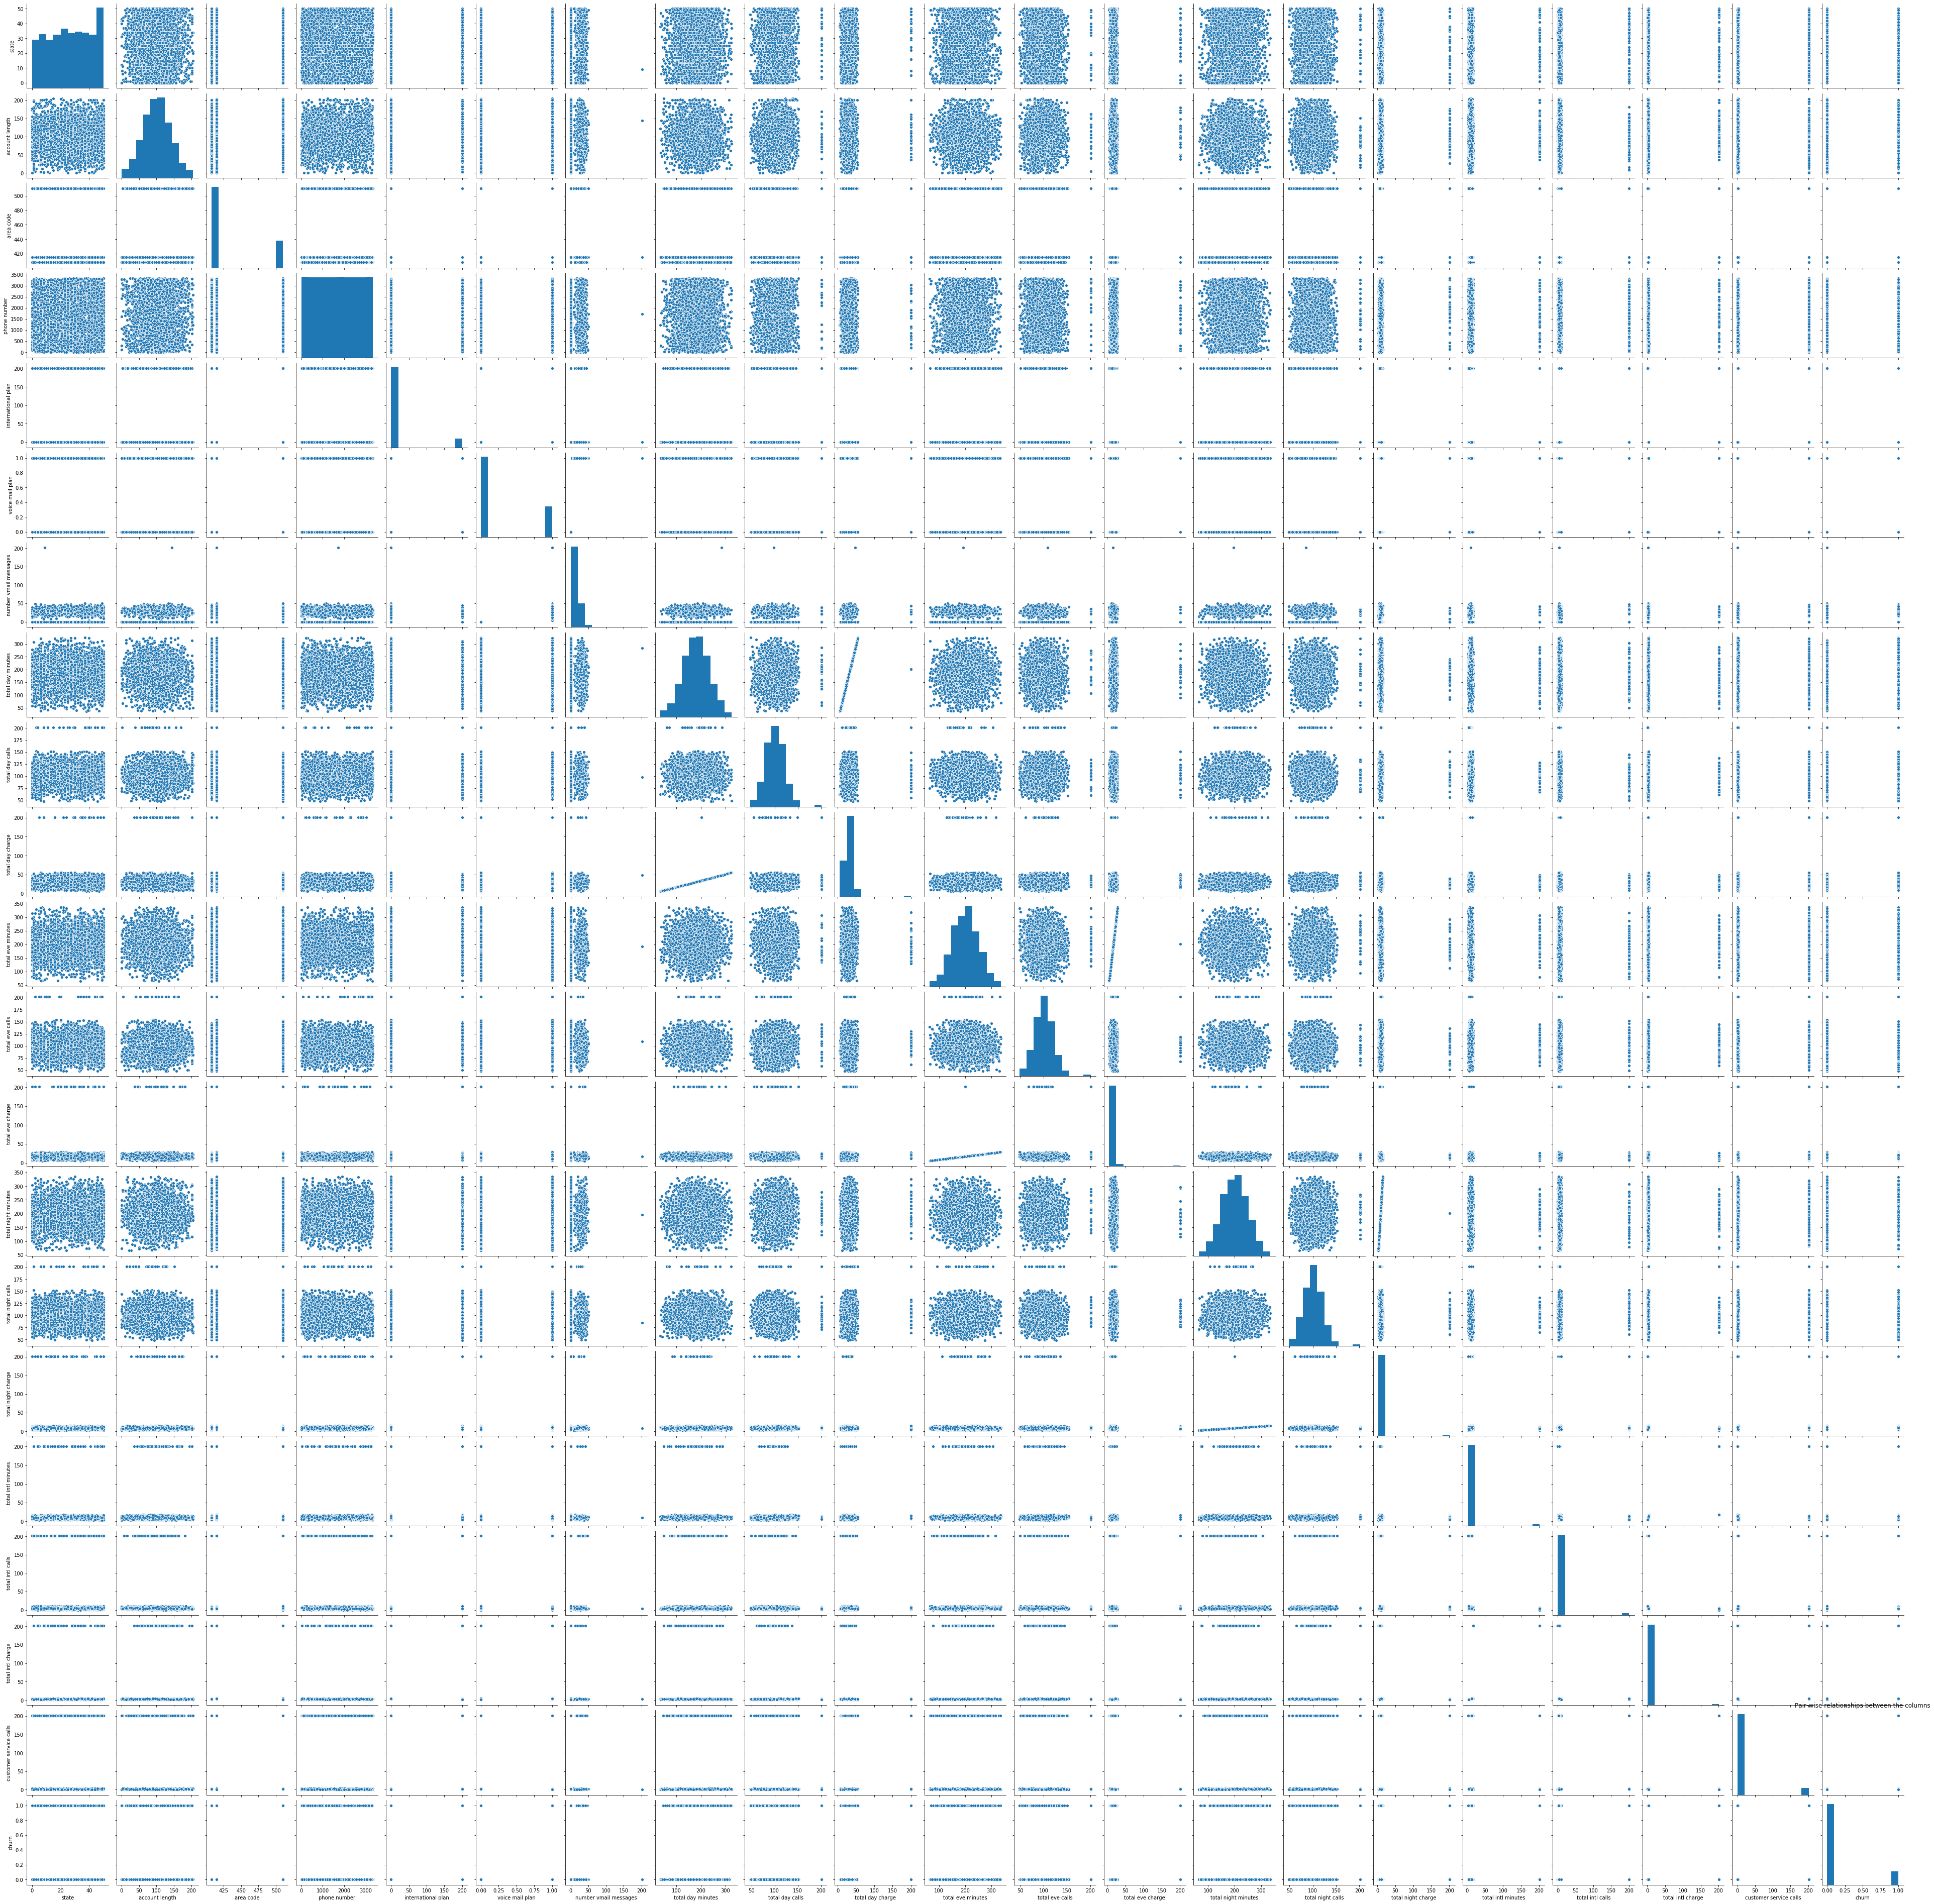

In [247]:
ax = sns.pairplot(df)
plt.title('Pair-wise relationships between the columns')
plt.show()

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking all of them in to the consideration.
But there is one field which is showing negative correlation with the targeted variable that is: number vmail messages

Thus, we will remove this column.

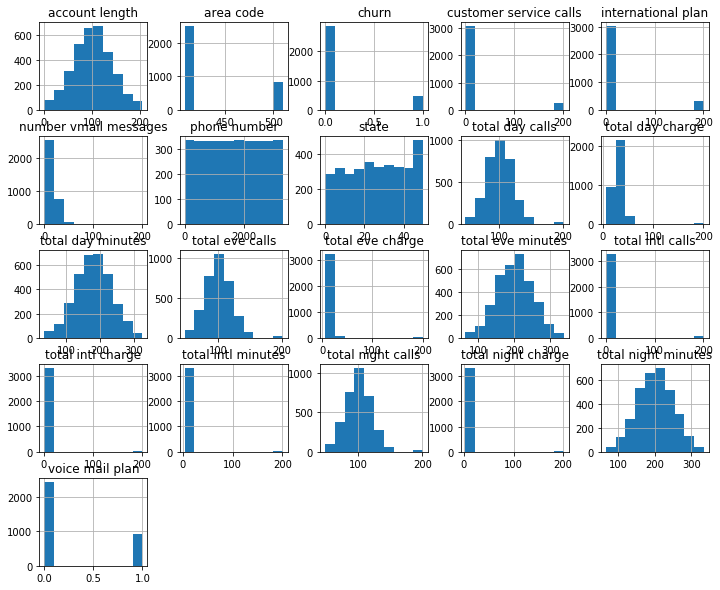

In [248]:
df.hist(figsize=(12, 10))
plt.show()

The above histogram shows the count of the customers: such as:
Almost 3000 customers have international plan in the range of 0 to 20.
In the range of 70 to 120 most of the total day calss use to happen by most of the customers.
Total day minutes is highest around 200. etc..

# Removing Outliers:
Removing the outliers from the data by using Z_SCORE

In [249]:
df.dtypes

state                       int64
account length            float64
area code                 float64
phone number                int64
international plan        float64
voice mail plan             int64
number vmail messages     float64
total day minutes         float64
total day calls           float64
total day charge          float64
total eve minutes         float64
total eve calls           float64
total eve charge          float64
total night minutes       float64
total night calls         float64
total night charge        float64
total intl minutes        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
churn                       int64
dtype: object

In [250]:
df.shape

(3333, 21)

In [251]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(3333, 21)


In [252]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(2550, 21)


After treating the outliers wit z score , we have successfully removed around 3333 rows, Hence, our final shape of the dataset has become now (2550,21)

Removing Columns as they are not in use to predict the below models:

In [253]:
df1.drop("phone number", axis=1,inplace=True)

In [254]:
#This column is showing the negative correlation with the target variable:
df1.drop("number vmail messages", axis=1,inplace=True)

In [255]:
#Final shape after removing 2 columns:
df1.shape

(2550, 19)

# Assigning X AND Y Variables:

In [256]:
x=df1.iloc[:,0:18]
x.shape
x

state  account length  area code  international plan  voice mail plan  \
0        16           128.0      415.0                 0.0                1   
1        35           107.0      415.0                 0.0                1   
2        31           137.0      415.0                 0.0                0   
11       39            74.0      415.0                 0.0                0   
12       12           168.0      408.0                 0.0                0   
...     ...             ...        ...                 ...              ...   
3327     40            79.0      415.0                 0.0                0   
3328      3           192.0      415.0                 0.0                1   
3329     49            68.0      415.0                 0.0                0   
3330     39            28.0      510.0                 0.0                0   
3332     42            74.0      415.0                 0.0                1   

      total day minutes  total day calls  total day charge  total eve minutes  \
0                 265.1            110.0             45.07              197.4   
1                 161.6            123.0             27.47              195.5   
2                 243.4            114.0             41.38              121.2   
11                187.7            127.0             31.91              163.4   
12                128.8             96.0             21.90              104.9   
...                 ...              ...               ...                ...   
3327              134.7             98.0             22.90              189.7   
3328              156.2             77.0             26.55              215.5   
3329              231.1             57.0             39.29              153.4   
3330              180.8            109.0             30.74              288.8   
3332              234.4            113.0             39.85              265.9   

      total eve calls  total eve charge  total night minutes  \
0                99.0             16.78                244.7   
1               103.0             16.62                254.4   
2               110.0             10.30                162.6   
11              148.0             13.89                196.0   
12               71.0              8.92                141.1   
...               ...               ...                  ...   
3327             68.0             16.12                221.4   
3328            126.0             18.32                279.1   
3329             55.0             13.04                191.3   
3330             58.0             24.55                191.9   
3332             82.0             22.60                241.4   

      total night calls  total night charge  total intl minutes  \
0                  91.0               11.01                10.0   
1                 103.0               11.45                13.7   
2                 104.0                7.32                12.2   
11                 94.0                8.82                 9.1   
12                128.0                6.35                11.2   
...                 ...                 ...                 ...   
3327              128.0                9.96                11.8   
3328               83.0               12.56                 9.9   
3329              123.0                8.61                 9.6   
3330               91.0                8.64                14.1   
3332               77.0               10.86                13.7   

      total intl calls  total intl charge  customer service calls  
0                  3.0               2.70                     1.0  
1                  3.0               3.70                     1.0  
2                  5.0               3.29                     0.0  
11                 5.0               2.46                     0.0  
12                 2.0               3.02                     1.0  
...                ...                ...                     ...  
3327               5.0            

In [257]:
y=df1.iloc[:,-1]
y.shape
y

0       0
1       0
2       0
11      0
12      0
       ..
3327    0
3328    0
3329    0
3330    0
3332    0
Name: churn, Length: 2550, dtype: int64

# Standard Scaler:

To bring all the values at the same scale(We can see that acc length and area code etc. are scaled at different parameters, so we will bring all the vallues at the same scale.)

In [258]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.head(10)

0         1         2    3         4         5         6         7  \
0 -0.686481  0.682559 -0.516662  0.0  1.620898  1.641536  0.496196  1.641831   
1  0.598185  0.157344 -0.516662  0.0  1.620898 -0.332210  1.172882 -0.332498   
2  0.327729  0.907651 -0.516662  0.0 -0.616942  1.227717  0.704407  1.227895   
3  0.868642 -0.667993 -0.516662  0.0 -0.616942  0.165517  1.381094  0.165571   
4 -0.956938  1.682968 -0.682661  0.0 -0.616942 -0.957706 -0.232543 -0.957329   
5 -0.010341 -0.142779  1.736184  0.0 -0.616942 -0.427560 -0.648966 -0.427850   
6 -0.889324 -0.392881 -0.682661  0.0  1.620898  0.331426  2.005727  0.331594   
7  1.341940 -0.192799  1.736184  0.0 -0.616942  0.222727  0.704407  0.222782   
8  1.274326 -0.617973  1.736184  0.0  1.620898  0.203657 -1.794128  0.203711   
9  1.139098 -0.693004 -0.516662  0.0 -0.616942  0.865387 -0.544860  0.865560   

          8         9        10        11        12        13        14  \
0 -0.075744 -0.051086 -0.075555  0.884709 -0.470745  0.883989 -0.103048   
1 -0.114486  0.155446 -0.113936  1.084117  0.159772  1.084993  1.315680   
2 -1.629474  0.516878 -1.629990 -0.803064  0.212315 -0.801703  0.740520   
3 -0.769009  2.478939 -0.768814 -0.116443 -0.313116 -0.116462 -0.448143   
4 -1.961834 -1.496815 -1.961026 -1.245051  1.473349 -1.244825  0.357080   
5  0.947842 -1.290283  0.948740 -0.192506  0.790289 -0.194123  0.778864   
6  1.626834 -0.515785  1.627606 -2.309931 -1.311434 -2.309232  1.354024   
7  0.348371  0.568512  0.349036 -1.481462  1.105548 -1.482375 -0.831583   
8  0.238264 -1.806614  0.238690 -0.739336  0.422488 -0.737747 -0.103048   
9 -0.848531 -0.619051 -0.847975 -0.182227 -1.363977 -0.180418  1.047272   

        15        16        17  
0 -0.63477 -0.103823 -0.325398  
1 -0.63477  1.316430 -0.325398  
2  0.33449  0.734126 -1.352336  
3  0.33449 -0.444684 -1.352336  
4 -1.11940  0.350658 -0.325398  
5  0.33449  0.776734  1.728477  
6 -0.15014  1.359038 -0.325398  
7 -0.63477 -0.828153  1.728477  
8  0.33449 -0.103823 -0.325398  
9 -1.11940  1.046582 -0.325398

# Model Testing:


# Logistic Regression
# Gaussian NB
# SVC
# Decision Tree Classifier
# KNeighbors Classifier

In [259]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [260]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2040, 18) (510, 18)
(2040,) (510,)


In [261]:
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [262]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.9568627450980393


CROSS_VAL_SCORE =  0.9498039215686275


ROC_AUC_SCORE =  0.7428363409433668


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.96      1.00      0.98       469
           1       0.95      0.49      0.65        41

    accuracy                           0.96       510
   macro avg       0.95      0.74      0.81       510
weighted avg       0.96      0.96      0.95       510



CONFUSION MATRIX [[468   1]
 [ 21  20]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


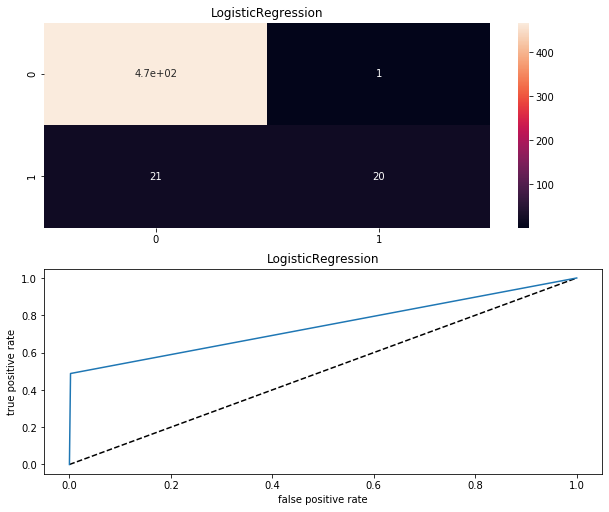




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.9294117647058824


CROSS_VAL_SCORE =  0.952156862745098


ROC_AUC_SCORE =  0.7724270632898227


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.96      0.96      0.96       469
           1       0.56      0.59      0.57        41

    accuracy                           0.93       510
   macro avg       0.76      0.77      0.77       510
weighted avg       0.93      0.93      0.93       510



CONFUSION MATRIX [[450  19]
 [ 17  24]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


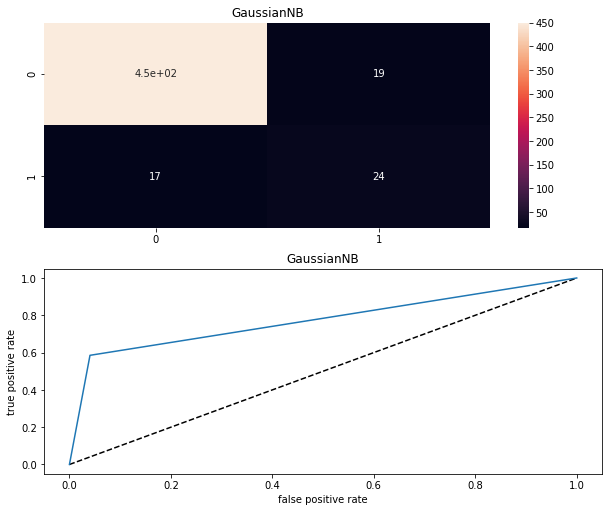




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.9509803921568627


CROSS_VAL_SCORE =  0.9545098039215686


ROC_AUC_SCORE =  0.7173799989599042


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.95      1.00      0.97       469
           1       0.90      0.44      0.59        41

    accuracy                           0.95       510
   macro avg       0.93      0.72      0.78       510
weighted avg       0.95      0.95      0.94       510



CONFUSION MATRIX [[467   2]
 [ 23  18]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


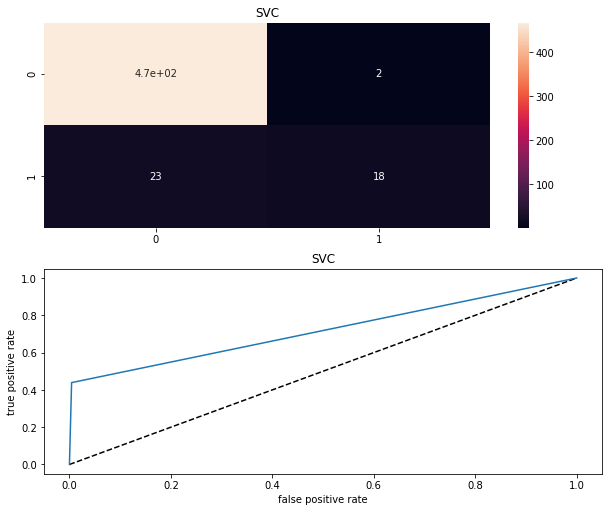




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.9117647058823529


CROSS_VAL_SCORE =  0.9223529411764707


ROC_AUC_SCORE =  0.7183160850798274


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.95      0.95      0.95       469
           1       0.45      0.49      0.47        41

    accuracy                           0.91       510
   macro avg       0.70      0.72      0.71       510
weighted avg       0.91      0.91      0.91       510



CONFUSION MATRIX [[445  24]
 [ 21  20

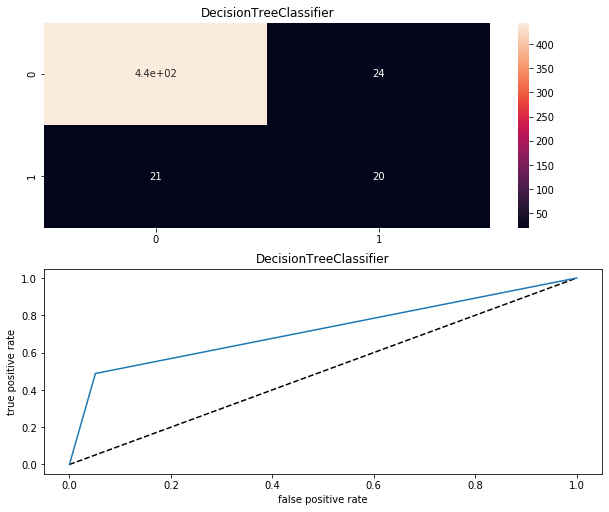




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.9352941176470588


CROSS_VAL_SCORE =  0.9415686274509805


ROC_AUC_SCORE =  0.6086899994799521


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.94      1.00      0.97       469
           1       0.90      0.22      0.35        41

    accuracy                           0.94       510
   macro avg       0.92      0.61      0.66       510
weighted avg       0.93      0.94      0.92       510



CONFUSION MATRIX [[468   1]
 [ 32   9]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


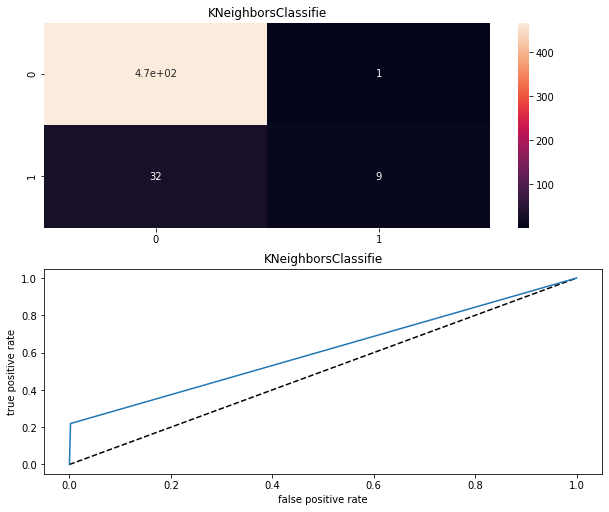

In [263]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

# Results:

In [264]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0      LogisticRegression       95.686275        94.980392      74.283634
1              GaussianNB       92.941176        95.215686      77.242706
2                     SVC       95.098039        95.450980      71.738000
3  DecisionTreeClassifier       91.176471        92.235294      71.831609
4     KNeighborsClassifie       93.529412        94.156863      60.869000

In the above result till now we have the Logistic Regression model, which is performing the best for the given dataset.

# Errors 

In [265]:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  0.1716552952103502
Mean Squared error :  0.08555238819015863
RMSE is :  0.2924933985411613


# Random Forest Classifier:

In [266]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
R_forest= RandomForestClassifier(n_estimators =100)
modelR= R_forest.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.9490196078431372
The f1 score of model 2 :  0.5806451612903225


In [267]:
pred_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [268]:
#Cross val score for random forest classifier:
print("Mean r2 score for R_forest classifier ",cross_val_score(R_forest,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst classifier ",cross_val_score(R_forest,x,y,cv=5,scoring="r2").std())

Mean r2 score for R_forest classifier  0.45109581272966476
Standard Deviation r2 score for R_forst classifier  0.12338477737611865


# Choosing A Model

Logistic Regression LOR

From the Exploratory data Analysis and the Various models tried abve we could see that among all the prediction Logistic Regression is giving the best output or prediction result which is 95.68% , cross val score in 94.98%. Other than this Random Forest classifier and SVC model is also giving the output near to the LOR, but they are slightly below the accuracy score of Logistic Regression.

Hence, I am going to choose the LOR i.e LogisticRegression model.

Through this model we will be able to predict the wheather the customer will be retained or get churned.


# Saving The Model

In [269]:
from sklearn.externals import joblib

In [270]:
joblib.dump(LOR,'Project_15_Customer_Churn_Analysis.obj')

['Project_15_Customer_Churn_Analysis.obj']

In [271]:
#loading back the model:
model=joblib.load('Project_15_Customer_Churn_Analysis.obj')

In [272]:
#Pridicting x_test Logistic Rregression = LOR
LOR.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,